In [22]:
import sys

import numpy as np
import pandas as pd
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sys

# Save the original stderr
original_stderr = sys.stderr

# Redirect stderr to /dev/null
sys.stderr = open('/dev/null', 'w')

In [2]:
songsDS = pd.read_csv("bb_normalized.csv", index_col=0)

/home/ajpan/.local/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


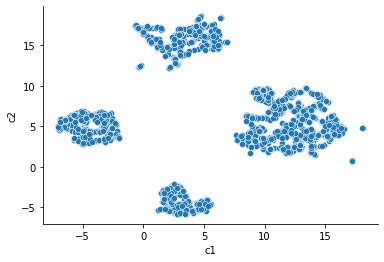

In [3]:
from umap import UMAP

umap_5_neigh = UMAP(n_components=2, random_state=99, min_dist=0.1, n_neighbors=5)
ucs = umap_5_neigh.fit_transform(songsDS)

ucs = pd.DataFrame(ucs,columns=['c1','c2'])
ucs.index = songsDS.index

sns.scatterplot(data=ucs, x='c1', y='c2')
sns.despine()
ax = plt.gca()

/home/ajpan/.local/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


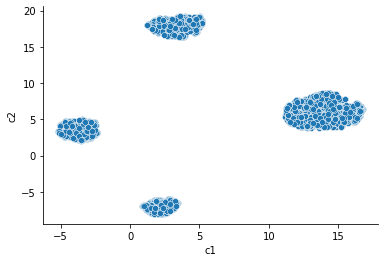

In [4]:
umap_25_neigh = UMAP(n_components=2, random_state=99, min_dist=0.1, n_neighbors=25)
ucs = umap_25_neigh.fit_transform(songsDS)

ucs = pd.DataFrame(ucs,columns=['c1','c2'])
ucs.index = songsDS.index

sns.scatterplot(data=ucs, x='c1', y='c2')
sns.despine()
ax = plt.gca()

/home/ajpan/.local/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


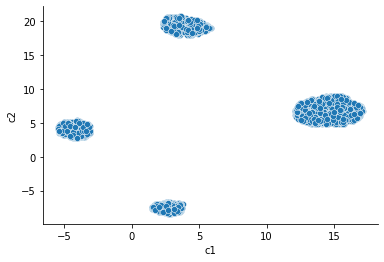

In [14]:
umap_50_neigh = UMAP(n_components=2, random_state=99, min_dist=0.1, n_neighbors=50)
ucs = umap_50_neigh.fit_transform(songsDS)

ucs = pd.DataFrame(ucs,columns=['c1','c2'])
ucs.index = songsDS.index

sns.scatterplot(data=ucs, x='c1', y='c2')
sns.despine()
ax = plt.gca()

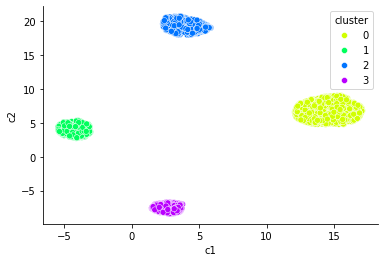

In [23]:
# KMeans
from sklearn.cluster import KMeans

k = 4  # Example: Choose the number of clusters
kmeans = KMeans(n_clusters=k, random_state=0).fit(ucs)

ucs['cluster'] = kmeans.labels_

sns.scatterplot(data=ucs, x='c1', y='c2', hue='cluster', palette=sns.color_palette("hsv", k))
sns.despine()
ax = plt.gca()
plt.show()

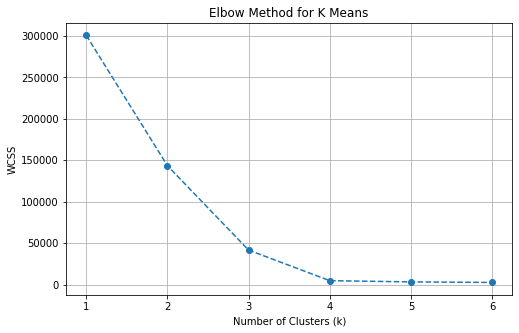

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def plot_elbow_method(data, max_clusters=10):
    wcss = []  # Within-cluster sum of squares
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
        wcss.append(kmeans.inertia_)  # WCSS for each k

    # Plot the Elbow Method
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS')
    plt.title('Elbow Method for K Means')
    plt.grid(True)
    plt.show()

plot_elbow_method(ucs, max_clusters=6)


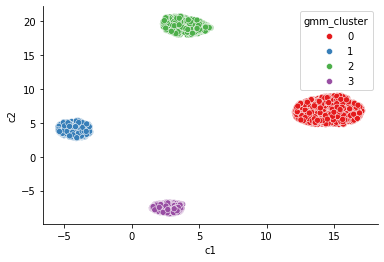

In [26]:
# GMM
from sklearn.mixture import GaussianMixture

n_components = 4  
gmm = GaussianMixture(n_components=n_components, random_state=0).fit(ucs)

ucs['gmm_cluster'] = gmm.predict(ucs)

sns.scatterplot(data=ucs, x='c1', y='c2', hue='gmm_cluster', palette=sns.color_palette("Set1", n_components))
sns.despine()
ax = plt.gca()
plt.show()

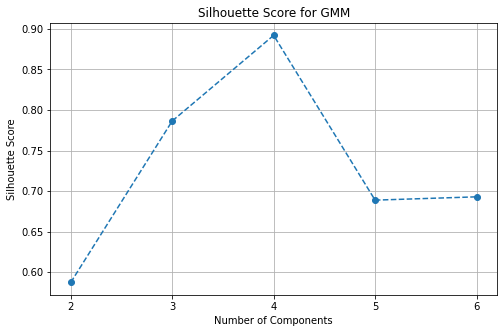

In [30]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

def calculate_silhouette_score(data, max_components=10):
    silhouette_scores = []
    for n_components in range(2, max_components + 1, 1):
        gmm = GaussianMixture(n_components=n_components, random_state=0).fit(data)
        labels = gmm.predict(data)
        silhouette_scores.append(silhouette_score(data, labels))

    # Plot the Silhouette Score
    plt.figure(figsize=(8, 5))
    plt.plot(range(2, max_components + 1, 1), silhouette_scores, marker='o', linestyle='--')
    plt.xlabel('Number of Components')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score for GMM')
    plt.grid(True)
    
    plt.xticks(range(2, max_components + 1))

    plt.show()
    
calculate_silhouette_score(ucs, max_components=6)


/home/ajpan/.local/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


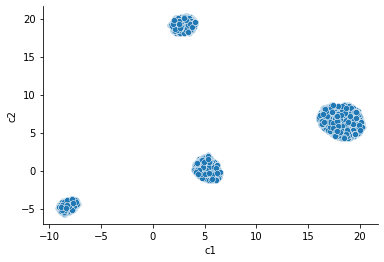

In [6]:
umap_100_neigh = UMAP(n_components=2, random_state=99, min_dist=0.1, n_neighbors=100)
ucs = umap_100_neigh.fit_transform(songsDS)

ucs = pd.DataFrame(ucs,columns=['c1','c2'])
ucs.index = songsDS.index

sns.scatterplot(data=ucs, x='c1', y='c2')
sns.despine()
ax = plt.gca()

## Trying out UMAP with unnormalized data

In [7]:
songsDS2 = pd.read_csv("bb.csv", index_col=0)

In [8]:
# Select only columns with float data type
# float_columns = songsDS2.select_dtypes(include=['float']).columns

cols = ['explicit', 'danceability', 'energy', 'loudness', 'mode', 'speechiness',
       'acousticness', 'liveness', 'valence', 'tempo']

# Create a new DataFrame with the same columns as the normalized data
df_floats = songsDS2[cols]

/home/ajpan/.local/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


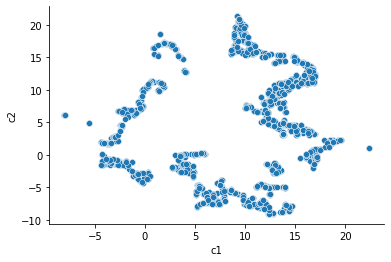

In [9]:
from umap import UMAP

umap_5_neigh = UMAP(n_components=2, random_state=99, min_dist=0.1, n_neighbors=5)
ucs = umap_5_neigh.fit_transform(df_floats)

ucs = pd.DataFrame(ucs,columns=['c1','c2'])
ucs.index = df_floats.index

sns.scatterplot(data=ucs, x='c1', y='c2')
sns.despine()

/home/ajpan/.local/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


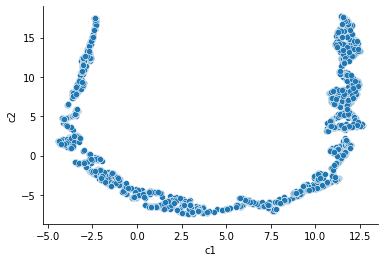

In [10]:
umap_25_neigh = UMAP(n_components=2, random_state=99, min_dist=0.1, n_neighbors=25)
ucs = umap_25_neigh.fit_transform(df_floats)

ucs = pd.DataFrame(ucs,columns=['c1','c2'])
ucs.index = df_floats.index

sns.scatterplot(data=ucs, x='c1', y='c2')
sns.despine()

/home/ajpan/.local/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


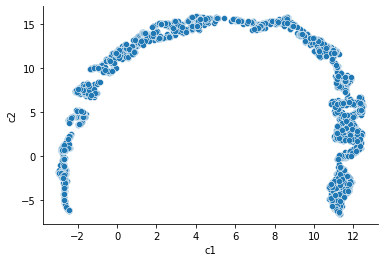

In [11]:
umap_50_neigh = UMAP(n_components=2, random_state=99, min_dist=0.1, n_neighbors=50)
ucs = umap_50_neigh.fit_transform(df_floats)

ucs = pd.DataFrame(ucs,columns=['c1','c2'])
ucs.index = df_floats.index

sns.scatterplot(data=ucs, x='c1', y='c2')
sns.despine()

/home/ajpan/.local/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


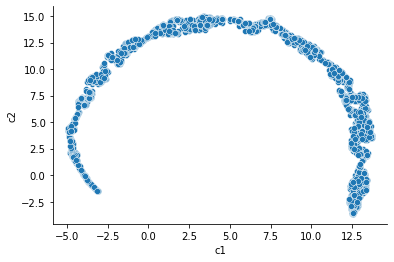

In [12]:
umap_50_neigh = UMAP(n_components=2, random_state=99, min_dist=0.1, n_neighbors=100)
ucs = umap_50_neigh.fit_transform(df_floats)

ucs = pd.DataFrame(ucs,columns=['c1','c2'])
ucs.index = df_floats.index

sns.scatterplot(data=ucs, x='c1', y='c2')
sns.despine()

In [47]:
songsDS2

,title,artist,album,release_date,popularity,duration_ms,explicit,year,ranking,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,type,gender,genre
track_id,,,,,,,,,,,,,,,,,,,,,
3y4LxiYMgDl4RethdzpmNe,Breathe,Faith Hill,Breathe,1999-11-09,68,250546,False,2000,1,0.529,...,0.0290,0.1730,0.000000,0.2510,0.278,136.859,4,p,f,Country
0n2SEXB2qoRQg171q7XqeW,Smooth (feat. Rob Thomas),Santana,Supernatural (Remastered),1999-06-15,72,294986,False,2000,2,0.609,...,0.0338,0.1600,0.000005,0.2950,0.961,115.996,4,g,m,Rock
3XKIUb7HzIF1Vu9usunMzc,Maria Maria (feat. The Product G&B),Santana,Supernatural (Remastered),1999-06-15,78,261973,False,2000,3,0.777,...,0.1260,0.0406,0.002010,0.0348,0.680,97.911,4,g,m,RnB
1m2xMsxbtxv21Brome189p,I Wanna Know,Joe,My Name Is Joe,2000-04-18,69,296693,False,2000,4,0.725,...,0.0368,0.2600,0.000011,0.4310,0.599,136.086,4,p,m,RnB
4cKGldbhGJniI8BrB3K6tb,Everything You Want,Vertical Horizon,Everything You Want,1999-06-14,64,257066,False,2000,5,0.636,...,0.0306,0.0517,0.000000,0.0642,0.736,93.896,4,g,m,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4nrPB8O7Y7wsOCJdgXkthe,"Shakira: Bzrp Music Sessions, Vol. 53",Bizarrap,"Shakira: Bzrp Music Sessions, Vol. 53",2023-01-11,85,214945,False,2023,96,0.778,...,0.0493,0.2740,0.000000,0.0915,0.498,122.104,4,p,m,EDM
67nepsnrcZkowTxMWigSbb,MELTDOWN (feat. Drake),Travis Scott,UTOPIA,2023-07-28,88,246133,True,2023,97,0.557,...,0.3510,0.0120,0.000000,0.3960,0.397,111.975,4,p,m,Hip-hop
6c6WmIHcHlhccEwSFBhzNa,Put It On Da Floor Again (feat. Cardi B),Latto,Put It On Da Floor Again (feat. Cardi B),2023-06-02,73,185748,True,2023,98,0.849,...,0.3170,0.0282,0.000000,0.0603,0.472,111.363,5,p,f,Hip-hop


# PCA

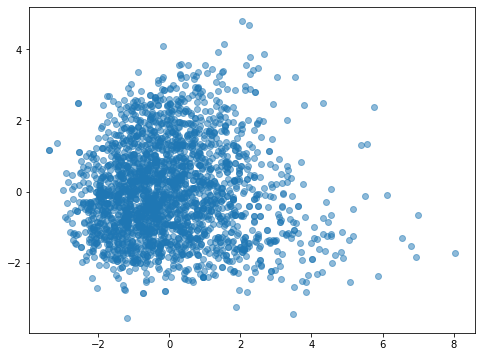

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(songsDS)

pca = PCA(n_components=2)  # We only want the first two principal components
principal_components = pca.fit_transform(scaled_data)

# Now, let's plot these two components
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.5)
plt.show()

# K Means

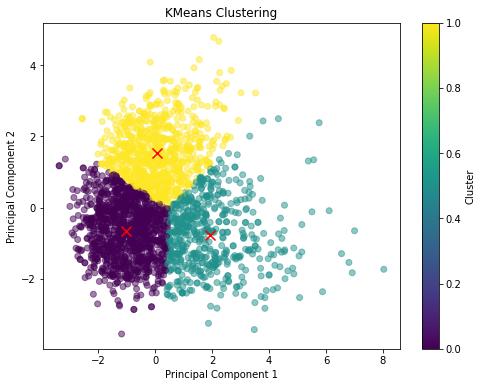

In [48]:
from sklearn.cluster import KMeans

# Initialize the KMeans model with desired number of clusters
kmeans = KMeans(n_clusters=3, random_state=0)  # You can adjust the number of clusters as needed

# Fit the KMeans model to the principal components
kmeans.fit(principal_components)

# Obtain the cluster labels
cluster_labels = kmeans.labels_

# Plot the clusters along with the principal components
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='red')  # Plot centroids
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


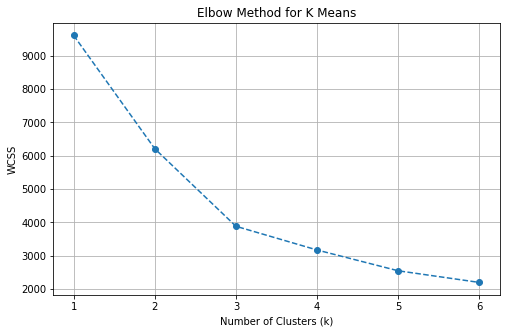

In [37]:
plot_elbow_method(principal_components, max_clusters=6)

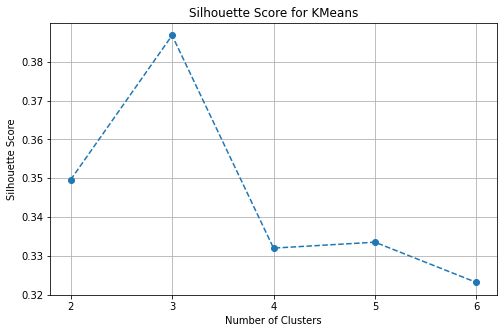

In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def calculate_silhouette_score2(data, max_clusters=10):
    silhouette_scores = []
    for n_clusters in range(2, max_clusters + 1, 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(data)
        labels = kmeans.labels_
        silhouette_scores.append(silhouette_score(data, labels))

    # Plot the Silhouette Score
    plt.figure(figsize=(8, 5))
    plt.plot(range(2, max_clusters + 1, 1), silhouette_scores, marker='o', linestyle='--')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score for KMeans')
    plt.grid(True)
    plt.xticks(range(2, max_clusters + 1))

    plt.show()

calculate_silhouette_score2(principal_components, max_clusters=6)